In [1]:
# Import from libraries.
from numpy import empty, zeros, max, linspace, meshgrid, exp, sqrt, sin # Import any other math functions you need here.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Current density function.
def Jz(x,y):
    # Current density for a wire with current flowing up 
    # the y-axis in the center of the square.
    a = 0.5 # Radius of the wire.
    if (sqrt(x**2+y**2)<a):
        Jz = 1
    else:
        Jz = 0
    return Jz

def gaussian(x,y,x0,y0):
    dx = x-x0
    dy = y-y0
    return exp(-dx**2-dy**2)

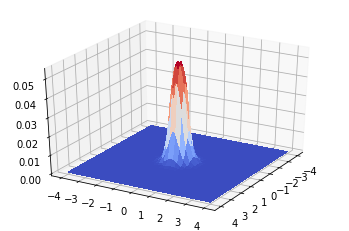

In [3]:
# Set constants.
M = 100 # Number of grid squares on a side.
Aztop = 1e-5 # Magnetic potential z-component at top boundary.
Azbottom = Aztop # Magnetic potential z-component at bottom boundary.
Azleft = Aztop # Magnetic potential z-component at left boundary.
Azright = Aztop # Magnetic potential z-component at right boundary.

xmin = -4 # Starting value of x & y.
xmax =  4 # Ending value of x & y.
dx = (xmax-xmin)/M # Step size. Don't need to change.

# Create arrays to hold magnetic potential values and points.
Az = zeros([M+1,M+1],float) # Current guess for magnetic potential.
Azprime = empty([M+1,M+1],float) # Next guess for magnetic potential.
xlist = linspace(xmin,xmax,M+1) # List of x-coordinates.
ylist = linspace(xmin,xmax,M+1) # List of y-coordinates.

# Set constant boundary conditions.
# Left edge, where i = 0 is fixed.
Az[0,:] = Azleft
# Right edge, where i = M is fixed.
Az[M,:] = Azright
# Bottom edge, where j = 0 is fixed.
Az[:,0] = Azbottom
# Top edge, where j = M is fixed.
Az[:,M] = Aztop

# If you need to set up a funciton along one of the edges,
# follow this example. It sets up Az(x,0) = xmax*x-x**2 along 
# the bottom edge. This is just a function picked for demonstration.
# Use Az[i,0] for the bottom edge, Az[i,M] for the top edge,
# Az[0,j] for the left edge, and Az[M,j] for the right edge.
# for i in range(0,M+1):
#     Az[i,0] = (xmax*xlist[i]-xlist[i]**2)*4/xmax**2

target = 1e-3 # Target accuracy, scaled by problem.

# Main loop
delta = 1.0 # Current error between Az and Azprime.
while delta > target: # Repeat until error is lower than target accuracy.
    # Calculate new values of the potential.
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: # Endpoitns stay fixed.
                Azprime[i,j] = Az[i,j]
            else:
                # Calculate next guess based on difference equation.
                Azprime[i,j] = (Az[i+1,j]+Az[i-1,j]+Az[i,j+1]+Az[i,j-1])/4 + dx**2/4*Jz(xlist[i],ylist[j])
    # Calculate maximum difference from old values.
    delta = max(abs(Az-Azprime))
    # Swap the two arrays.
    Az,Azprime = Azprime,Az

# Turn lists into a format that matplotlib wants.
X, Y = meshgrid(xlist, ylist)

# Set viewing angle for graph.
angle = 30

# Create figure and plot.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Az, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30, angle)
plt.draw()

# Need a different view? Change new_angle (in degrees) in the next cell and run it. 
# Then you can regraph your results without having to re-run the computation.

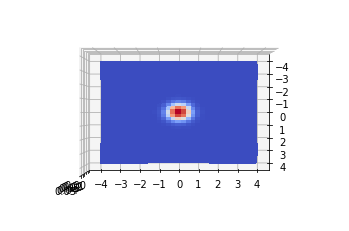

In [4]:
# Set new angle, in degrees.
new_angle = 0

# Create new figure and plot.
new_fig = plt.figure()
new_ax = new_fig.add_subplot(111, projection='3d')
new_surf = new_ax.plot_surface(X, Y, Az, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
new_ax.view_init(90, new_angle)
plt.draw()